CellPose tutorial
https://github.com/MouseLand/cellpose/blob/main/notebooks/run_cellpose_GPU.ipynb

In [1]:
! nvidia-smi

Tue Jun 20 22:27:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:05.0 Off |                    0 |
| N/A   34C    P0    52W / 300W |      0MiB / 32510MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from cellpose import models, core
import tifffile as tf
import matplotlib.pyplot as plt
from dask_image.imread import imread

use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

>>> GPU activated? 1


In [3]:
# Set up root directory
root = "/lustre/scratch126/cellgen/team283/tl10/EMBL_training/training/segmentation/in/"

In [4]:
ref_DAPI = imread(f"{root}/demo_optflow_seg_optflow_reg_result_stack.tif")[0].squeeze()
ref_DAPI.shape

(4114, 4369)

In [5]:
model = models.Cellpose(gpu=use_GPU, model_type='cyto2') # Initialize model

In [6]:
channels = [[0, 0]] # Use just DAPI channel for segmentation

In [7]:
masks, flows, styles, diams = model.eval(ref_DAPI, diameter=None, flow_threshold=None, channels=channels) # Run segmentation

In [13]:
# DISPLAY RESULT
from skimage.color import label2rgb

In [14]:
image_label_overlay = label2rgb(masks, image=ref_DAPI, bg_label=0)

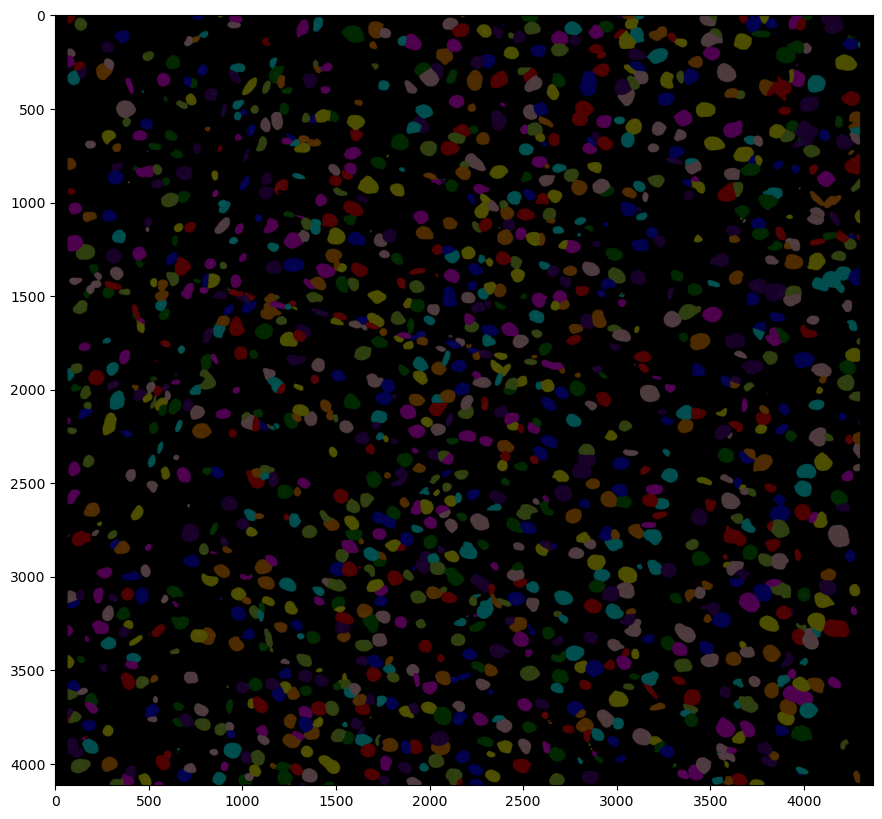

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(image_label_overlay)

In [16]:
from skimage.segmentation import expand_labels

In [17]:
expanded_masks = expand_labels(masks, distance=10)

In [18]:
expanded_image_label_overlay = label2rgb(expanded_masks, image=ref_DAPI, bg_label=0)

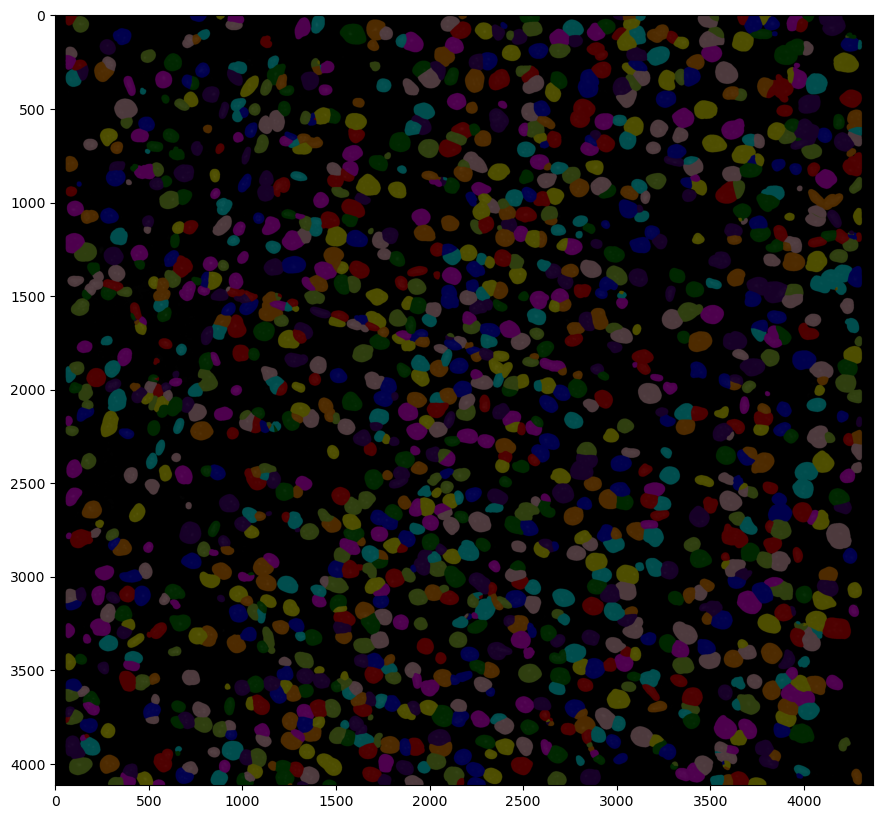

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(expanded_image_label_overlay)